In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
X, y = make_moons(100, noise=0.25,random_state=2)

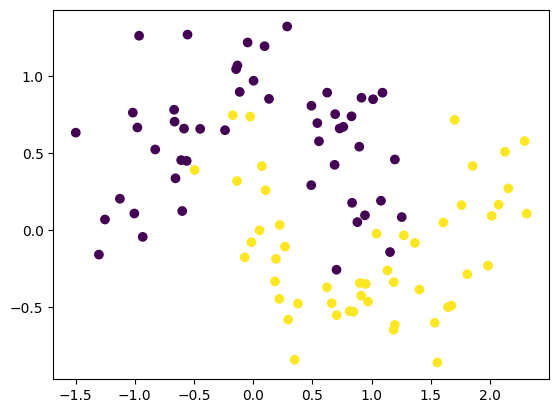

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [7]:
model1 = Sequential()  # Initialize a sequential model.

model1.add(Dense(128, input_dim=2, activation="relu"))  # Add a dense layer with 128 neurons, ReLU activation, and input dimension 2.
model1.add(Dense(128, activation="relu"))  # Add another dense layer with 128 neurons and ReLU activation.
model1.add(Dense(1, activation='sigmoid'))  # Add an output dense layer with 1 neuron and sigmoid activation.

model1.summary()  # Display the model's architecture summary.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
adam = Adam(learning_rate=0.01)  # Initialize the Adam optimizer with a learning rate of 0.01.

model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
# Compile the model with binary crossentropy loss, the Adam optimizer, and accuracy as a metric.

history1 = model1.fit(X, y, epochs=700, validation_split=0.2, verbose=0)
# Train the model for 200 epochs using data (X, y), with 20% of data used for validation; no output shown (verbose=0).


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


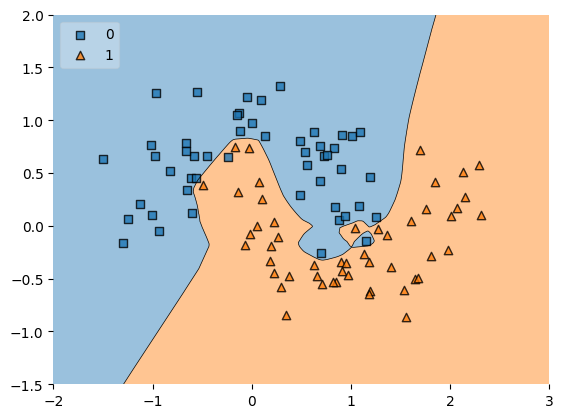

In [11]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

# The model is Overfitting :(

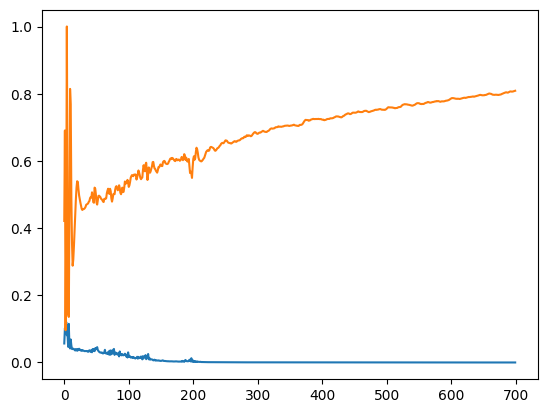

In [12]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [13]:
model2 = Sequential()  # Initialize another sequential model.

model2.add(Dense(128, input_dim=2, activation="relu", kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
# Add a dense layer with 128 neurons, ReLU activation, input dimension 2, and L2 regularization (penalty = 0.03).

model2.add(Dense(128, activation="relu", kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
# Add another dense layer with 128 neurons, ReLU activation, and L2 regularization (penalty = 0.03).

model2.add(Dense(1, activation='sigmoid'))
# Add an output dense layer with 1 neuron, sigmoid activation, and no regularization.

model2.summary()  # Display the model's architecture summary.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=700, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


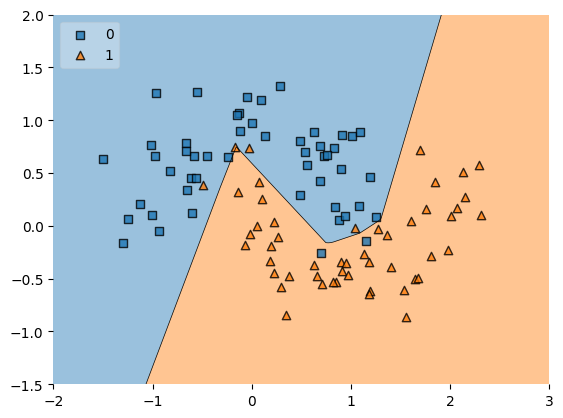

In [15]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

# Now it gave a good result

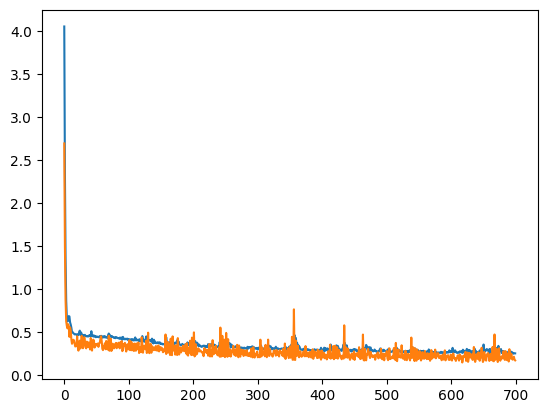

In [16]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])